In [41]:
import cv2 as cv
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import numpy as np
from matplotlib import pyplot as plt


# Downloading and showing images

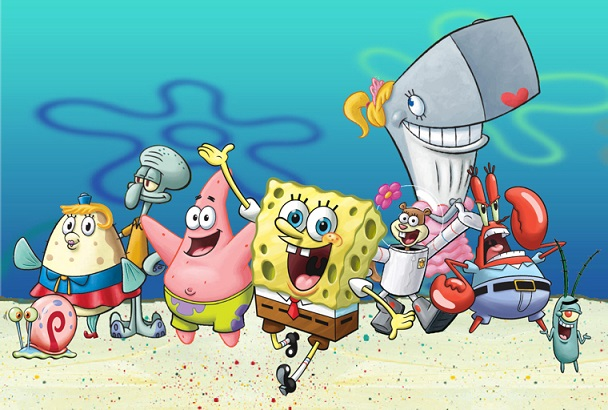

In [42]:
# Create a list to store the urls of the images
urls = ['https://www.si.edu/sites/default/files/newsdesk/press_releases/sponge'\
        'bob_squarepants_characters_cast.png']  

images = []

# Read and display the image
# loop over the image URLs, you could store several image urls in the list

for url in urls:
  image = io.imread(url)
  rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  images.append(image)
      
  cv2_imshow(rgb_image)


The template


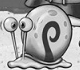

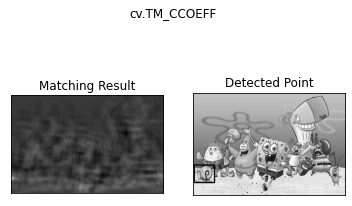

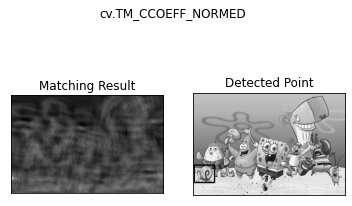

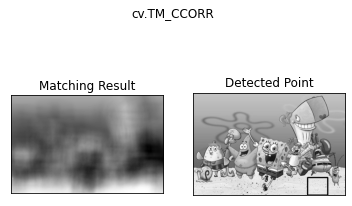

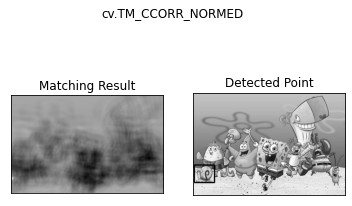

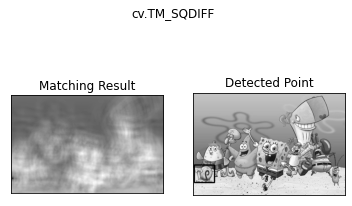

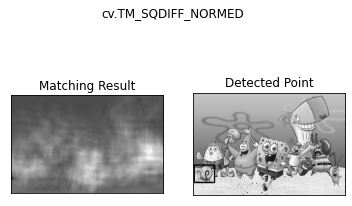

In [45]:

img_rgb = images[0].copy()
img_gray = cv.cvtColor(img_rgb, cv.COLOR_BGR2GRAY)
template = img_gray[290:360,5:85] # slice part of the picture

print ("The template")
cv2_imshow(template)

w, h = template.shape[::-1]

# All the 6 methods for comparison in a list
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
for meth in methods:
    img = img_gray.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv.rectangle(img,top_left, bottom_right, (0,255,0), 3)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()